# Résolution du Problème de Tournée de Véhicules (VRP) avec un Algorithme Génétique

## Introduction

Le Problème de Tournée de Véhicules (VRP) est un problème combinatoire complexe visant à déterminer les routes optimales pour une flotte de véhicules afin de livrer des marchandises à un ensemble de clients tout en minimisant la distance totale parcourue. Ce projet vise à résoudre le VRP en utilisant un algorithme génétique.

## Modélisation du Problème Algorithmique

### Définition du Problème Formel
Il nous a été demandé de résoudre un problème de tournées de véhicule. Nous avons décidé que les sommets à visiter seronts définis par leurs coordonnées. Dans notre cas, nous devrons trouver des itinéraires pour effectuer des tournées de livraisons pour atteindre différentes villes sur un large territoire, nous admettons alors que le graphe est complet, et non orienté. Par ailleurs, la plupart des datasets de recherche utilisent les mêmes contraintes pour leurs implémentations d'algorithmes. L'objectif est de passer une fois seulement par tous les sommets, et de revenir au point de départ, en minimisant la distance totale parcourue.

Le VRP peut être formellement défini comme suit :
- **Hypothèses** :
    - Nous ne traitons qu'une seule commande.
    - Pas de fenêtres de temps dans lesquelles les livraisons (ou visites) doivent être effectuées.
    - Les véhicules ne sont pas tenus de retourner au dépôt (problème de routage ouvert).
- **Entrée :**
  - Un ensemble de clients avec des coordonnées géographiques.
  - Une demande spécifique pour chaque client.
  - Un nombre fixe de véhicules, chacun avec une capacité limitée.
  - Une matrice des distances entre chaque paire de points (client et dépôt).

- **Sortie :**
  - Un ensemble de routes pour chaque véhicule, où chaque route commence et se termine au dépôt, et chaque client est visité exactement une fois.

### Étude de Complexité

Le VRP est un problème NP-difficile, ce qui signifie qu'il n'existe pas d'algorithme polynomial pour le résoudre de manière exacte pour de grandes instances. La complexité augmente exponentiellement avec le nombre de clients et de véhicules.
Le cas par exemple plus simple du _TSP_ ou la solution est de trouver un chemin ou le commercant ne visite qu'une seule fois chaque ville et retourne a la ville de depart tout en minimisant les couts est de complexite **n!** et si nous avons un puissance de calcul de 1000000 operation/secondes nous obtenons ces resultats:
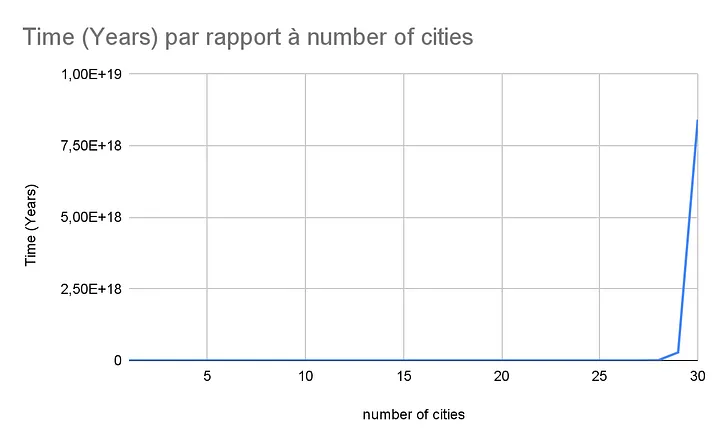<br>
Cela veut dire que si nous ne traitons qu'avec 24 villes, nous aurions besoin d'un temps au dessus de l'age de la terre pour trouver la solution optimale( si nous devons tester toutes les possibilites)
Raison pour laquelle, nous optons pour une solution non-deterministe (meta-heuristique) qui donnera des bons resultats sans pour autant etre la meilleure.

## Choix et Description de l'Algorithme


### Comparative Table of Metaheuristic Algorithms for VRP

| Criterion                   | Genetic Algorithm (GA)               | Simulated Annealing (SA)              | Tabu Search (TS)                        | Ant Colony Optimization (ACO)           |
|-----------------------------|--------------------------------------|---------------------------------------|-----------------------------------------|-----------------------------------------|
| **Global Exploration**      | Excellent (due to population diversity and recombination) | Good (through slow cooling)           | Average (through diversification)       | Good (through ant exploration)          |
| **Local Exploitation**      | Good (selection and recombination of best solutions) | Average (through temperature adjustment) | Excellent (through memory and intensification) | Average (through pheromone updates)      |
| **Adaptability and Flexibility** | Very High (easy to adapt to various problems and constraints) | Average (can be adapted with difficulty) | Average (requires adjustments for different constraints) | Good (adaptable through colony design)  |
| **Scalability**             | Very High (adapts well to large problems) | Average (can be slow for large problems) | Good (scalable but can be slow)         | Good (scalable but with increased complexity) |
| **Ease of Parallelization** | Excellent (natural parallelism of population) | Average (requires adjustments for parallelism) | Average (parallelism possible but non-trivial) | Good (parallelism through ant exploration) |
| **Hybridization**           | Very Easy (hybridization with other techniques) | Average (can be difficult to combine) | Good (often hybridized with local search) | Average (can be hybridized but with increased complexity) |
| **Ease of Implementation**  | Average (complexity in designing operators) | High (simple implementation)           | Average (complexity in managing tabu lists) | Average (requires pheromone management) |
| **Convergence Time**        | Variable (can be long but often finds good solutions) | Slow (convergence depends on cooling schedule) | Fast (finds solutions quickly but may require adjustments) | Variable (can be fast but depends on parameter tuning) |
| **Empirical Performance**   | Very High (demonstrated strong performance on many problems) | Good (effective for many problems but depends on cooling) | Very High (strong performance for many problems) | Good (effective but with complex parameter tuning) |
| **Adaptation to Large Problem Sizes** | Very Good (can handle large problems effectively) | Average (can become inefficient for large problems) | Good (can handle large problems with adjustments) | Good (can handle large problems but requires many ants) |



Other algorithms like Simulated Annealing, Tabu Search, and Ant Colony Optimization have their own strengths but may have limitations in terms of flexibility, scalability, or convergence time. This makes GAs a robust and versatile option for solving the VRP.
### Fonctionnement de l'Algorithme Génétique

Les algorithmes génétiques sont des heuristiques appartenant a la classe des algorithmes evolutifs, inspirées par le processus de sélection naturelle. Ils sont particulièrement efficaces pour les problèmes d'optimisation complexes comme le VRP.<br>
Il repose sur differents elements:

- **Population :** elle représente un ensemble de solutions à notre problème.
- **Chromosome :** c'est un ensemble de paramètres qui définissent une solution proposée au problème que l'algorithme génétique essaie de résoudre.
- **Gène :** c'est une information élémentaire du chromosome. Il peut être binaire ou non.
- **Génération :** c'est la transition d'une population à une autre. En général, nous définissons le nombre de générations et en faisons le point de terminaison.<br>
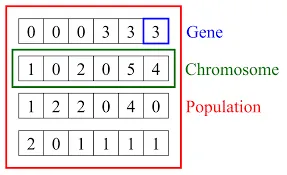<br>
- **Fonction de fitness :** c'est une fonction objective utilisée pour résumer à quel point une solution de conception donnée est proche d'atteindre les objectifs fixés. La fonction de fitness est utilisée pour guider les simulations vers des solutions de conception optimales. Pour un problème à objectif unique, l'évaluation est systématique ; cependant, pour un problème multi-objectifs, nous parlons de front de Pareto qui caractérise plusieurs solutions optimales et les juge ensuite selon certains critères.
- **Sélection :** à chaque génération successive, une partie de la population existante est sélectionnée pour générer une nouvelle génération. Les solutions individuelles sont sélectionnées par un processus basé sur le fitness, où les solutions les mieux adaptées sont généralement plus susceptibles d'être sélectionnées. Nous pouvons énumérer plusieurs types de sélection, tels que la _sélection par roulette_, la sélection _par rang_, la sélection _par tournoi_, etc.
- **Croisement :** utilisé pour combiner les informations génétiques de deux parents afin de générer une nouvelle descendance. C'est une façon de générer de manière stochastique de nouvelles solutions à partir d'une population existante.
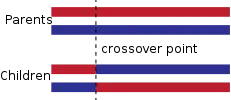<br>

- **Mutation :** utilisée pour maintenir la diversité génétique d'une génération de chromosomes d'algorithme génétique à l'autre.
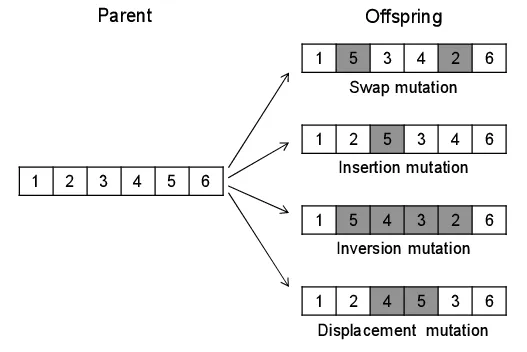<br>

#### Étapes Principales :
1. **Initialisation :** Générer une population initiale de solutions possibles.
2. **Sélection :** Choisir les meilleures solutions basées sur une fonction de fitness.
3. **Croisement (Crossover) :** Combiner des paires de solutions pour produire une nouvelle génération.
4. **Mutation :** Apporter des modifications mineures à certaines solutions pour maintenir la diversité.
5. **Évaluation :** Calculer la fonction de fitness pour chaque solution.
6. **Itération :** Répéter les étapes de sélection, croisement et mutation jusqu'à ce qu'un critère de convergence soit atteint.

### Paramètres Utilisés 
- **Taille de la population :** Nombre de solutions considérées à chaque itération.
- **Probabilité de croisement :** Proportion de solutions combinées pour créer de nouvelles solutions.
- **Probabilité de mutation :** Proportion de solutions modifiées à chaque génération.
- **Nombre de générations :** Nombre total d'itérations du processus évolutif.

### Spécificités Algorithmiques Ajoutées
- **Élites :** Conservation des meilleures solutions à chaque génération pour assurer une convergence optimale.
- **Réparation de solutions :** Ajustement des solutions pour respecter les contraintes de capacité des véhicules.



## Modélisation du Problème Selon le Formalisme de l'Algorithme

### Représentation des Solutions
Chaque solution est représentée comme un ensemble de routes, où chaque route est une séquence ordonnée de clients desservis par un véhicule.

### Fonction de Fitness
La fonction de fitness évalue la qualité d'une solution en calculant la distance totale parcourue par tous les véhicules, pénalisant les solutions qui dépassent la capacité des véhicules.

## Illustration avec Différents Cas de Tests

### Cas de Test 1 : Instance Petite
- **Description :** Une instance avec 5 clients et 2 véhicules.
- **Résultats :** Présentation de la meilleure solution trouvée et comparaison avec une solution de référence.

### Cas de Test 2 : Instance Moyenne
- **Description :** Une instance avec 20 clients et 3 véhicules.
- **Résultats :** Visualisation de la solution et analyse de la performance de l'algorithme.

### Cas de Test 3 : Instance Grande
- **Description :** Une instance avec 50 clients et 5 véhicules.
- **Résultats :** Évaluation de la robustesse et de la scalabilité de l'algorithme pour de grandes instances.



# Étude Statistique du Comportement Expérimental

## Génération et Utilisation des Datasets

Pour évaluer le comportement de l algorithme génétique, nous avons utilisé des datasets générés aléatoirement ainsi que des datasets issus de la recherche scientifique. Cela nous a permis de tester notre algorithme sur une variété de scénarios, en nous assurant qu'il est robuste et performant dans différents contextes.

![Dataset Aléatoire](https://example.com/random_dataset.png)
![Dataset Scientifique](https://example.com/scientific_dataset.png)

## Statistiques Descriptives

L'objectif de la statistique descriptive est de décrire, c'est-à-dire de résumer ou représenter, par des statistiques, les données disponibles quand elles sont nombreuses.

- **Population** : La population est l’ensemble des individus (ou unités statistiques) auxquels on décide de s’intéresser. Le choix de la population étudiée dépend du problème qui est à l’origine de la démarche statistique, et de la façon dont on décide de le traiter.

- **Individu** : Un individu est un élément d'un ensemble, généralement appelé « population », dont on mesure (ou observe) la valeur qu'il a pour la variable étudiée. Pour une étude sur les catégories professionnelles, un individu observé peut être, par exemple, « un enseignant », « un médecin », « un secrétaire », etc.

- **Modalité** : Une modalité est la valeur prise par une variable statistique qu’elle soit qualitative ou quantitative. Les modalités correspondent donc à l’ensemble des valeurs possibles.

Dans notre cas, nous avons fait notre étude sur nos résultats obtenus par notre algorithme.

Nous avons analysé les statistiques descriptives et, dans certains cas, prédictives du comportement de l'algorithme, en les comparant aux exigences industrielles. Les paramètres étudiés incluent :

- **Taille et largeur du graphe**
- **Degré des nœuds**
- **Nombre de demandes**
- **Capacité des véhicules**
- **Nombre de véhicules**
- **Distance entre les points de livraison**

## Exploitation des Paramètres

Nous avons exploré l'impact des différents paramètres de l'instance du problème et de l'algorithme sur les performances :

- **Taille et largeur du graphe**
- **Degré des nœuds**
- **Nombre de clients et de véhicules**
- **Capacité des véhicules**
- **Paramètres de l'algorithme :** température, taille de liste tabou, nombre de mutations, etc.

![Paramètres de l'algorithme](https://example.com/algorithm_parameters.png)
![Paramètres du graphe](https://example.com/graph_parameters.png)<br>
Les resultats sont les suivants:<br>
La fonction summary() permet d'avoir la description statistique d'une variable ou d'une table de donnée (dataset).

Pour une variable donnée, la fonction renvoie 5 valeurs : le minimum (Min.), le premier quartile (1st Qu.), la médiane (Median), la moyenne (Mean), le troisième quartile (3rd Qu.) et le maximum (Max).

Aussi, nous avon calculé l'écart type qui nous permet (racine carré de la variance) de mesurer la dispersion de l'échantillon statistique, c'est-à-dire mesurer la variabilité des valeurs prélevées autour de leur moyenne. Plus l'écart type est faible, plus la population est homogène.

Le parametre range nous permet d'avoir la valeur maximun et minimun de notre dataset.

Dans notre cas nous avons exécuter notre programme d'une durée de 80 secondes.

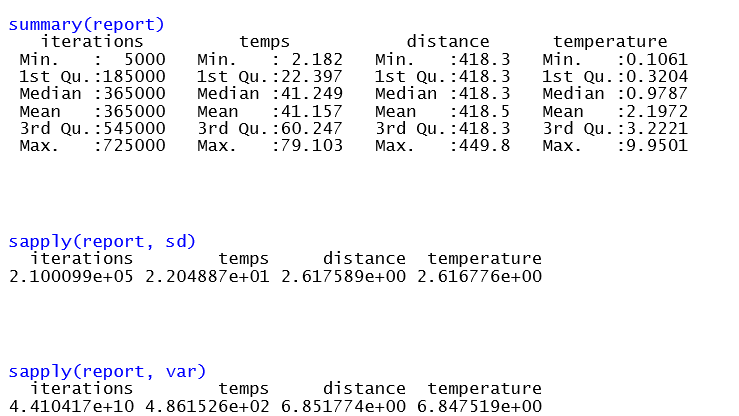

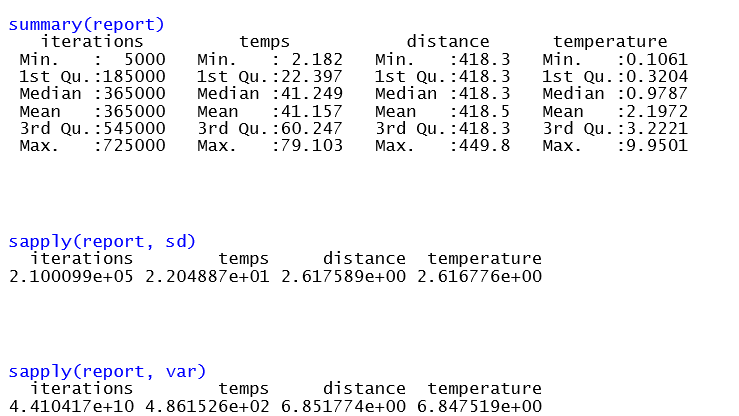

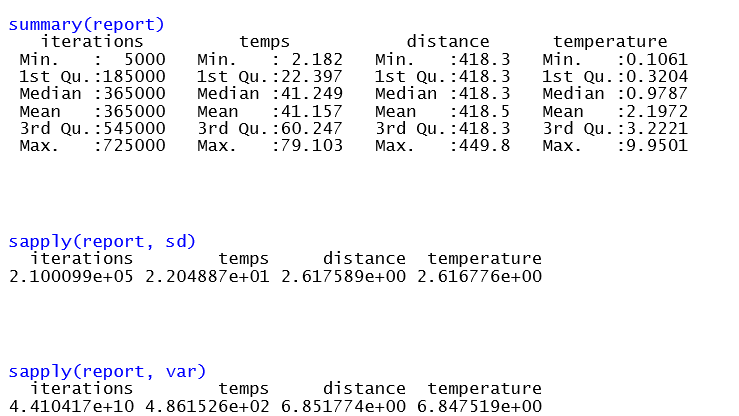




## Analyse et Commentaire des Résultats

### Qualité des Solutions

- **Description :** Analyse de la qualité des solutions obtenues par rapport aux solutions optimales ou de référence.
- **Résultats :** Comparaison des solutions en termes de distance totale parcourue et de respect des contraintes.

![Qualité des solutions](https://example.com/solution_quality.png)


### Temps de Convergence

- **Description :** Étude du temps nécessaire pour que l'algorithme converge vers une solution optimale ou quasi-optimale.
- **Résultats :** Analyse du temps de convergence en fonction de la taille des instances et des paramètres de l'algorithme.

![Temps de convergence](https://example.com/convergence_time.png)

### Nombre d'Itérations

- **Description :** Évaluation du nombre d'itérations nécessaires pour atteindre une solution satisfaisante.
- **Résultats :** Comparaison du nombre d'itérations pour différentes configurations de paramètres.

![Nombre d'itérations](https://example.com/iterations_count.png)
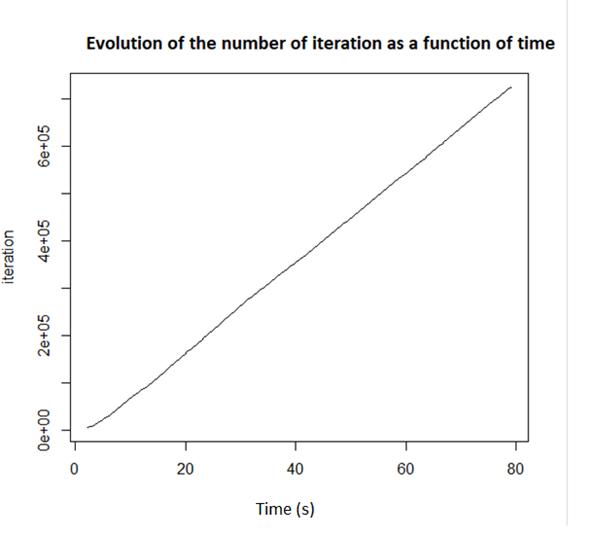

### Espace Mémoire

- **Description :** Analyse de la consommation de mémoire de lalgorithme.
- **Résultats :** Évaluation de lespace mémoire requis en fonction de la taille de la population et des solutions.

![Consommation de mémoire](https://example.com/memory_usage.png)
![image_code](img_solution/memoiretempscode.png)
![image_illustration](img_solution/memoiretempsill.png)


L étude statistique du comportement expérimental de notre algorithme génétique a révélé des informations précieuses sur son efficacité et sa robustesse. En analysant des datasets variés, nous avons pu identifier les paramètres influençant significativement les performances de lalgorithme. Ces insights nous permettront d'optimiser notre approche et de mieux comprendre les compromis entre la qualité des solutions, le temps de convergence, le nombre d'itérations et l'espace mémoire requis.




# Conclusion

Résumé des résultats obtenus, discussion des avantages et des limites de lapproche par algorithme génétique, et propositions pour des travaux futurs.

# Références

- **Articles Scientifiques :**
  - [https://www.hexaly.com/docs/last/exampletour/vrp.html]
  - [https://medium.com/@writingforara/solving-vehicle-routing-problems-with-python-heuristics-algorithm-2cc57fe7079c]
  - [https://www.researchgate.net/publication/257885840_Solving_the_vehicle_routing_problem_by_a_hybrid_meta-heuristic_algorithm?enrichId=rgreq-dac803122ec2044fb78cadcda68868c8-XXX&enrichSource=Y292ZXJQYWdlOzI1Nzg4NTg0MDtBUzoyMDE1OTQ0MDc3ODg1NDRAMTQyNTA3NTI2MDI3Mw%3D%3D&el=1_x_2&_esc=publicationCoverPdf]
  - [https://medium.com/@najid110/multi-type-of-capacitated-vehicle-routing-problem-with-a-genetic-algorithm-ga-and-deap-library-in-399135f6357a]
- **Ouvrages Spécialisés :**
  - [https://how-to.aimms.com/Articles/332/332-Formulation-CVRP.html]
  - W. K. Hastings, Monte Carlo sampling methods using Markov chains and their applications, Biometrika, vol. 57, pp. 97-109 (1970)
  - C. P. Robert and G. Casella, Monte Carlo Statistical Methods, Springer-Verlag, 2004
  - J.-M. Marin and C. P. Robert, Bayesian Core: A Practical Approach to Computational Bayesian Statistics, Springer-Verlag, 2007

